In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

# Data preprocessing

In [3]:
from pandas_datareader import data as web
TWII = web.DataReader(name='^TWII', data_source='yahoo',
                     start='2000-01-01')
TWII.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,8644.910156,8803.610352,8642.500000,8756.549805,8756.549805,0.0
2000-01-05,8690.599609,8867.679688,8668.019531,8849.870117,8849.870117,0.0
2000-01-06,8900.559570,9023.990234,8833.910156,8922.030273,8922.030273,0.0
2000-01-07,8853.429688,8940.769531,8739.429688,8849.870117,8849.870117,0.0
2000-01-10,8941.929688,9126.019531,8891.790039,9102.599609,9102.599609,0.0


In [4]:
cols = ['Adj Close']
df = TWII[cols]

In [6]:
for i in range(10):
    new_col = 'Close_t-'+str(i+1)
    df[new_col] = df['Adj Close'].shift(i+1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
df

,Adj Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,Close_t-10
Date,,,,,,,,,,,
2000-01-04,8756.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,8849.870117,8756.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,9102.599609,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,8927.030273,9102.599609,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN,NaN,NaN
2000-01-12,9144.650391,8927.030273,9102.599609,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN,NaN
2000-01-13,9107.190430,9144.650391,8927.030273,9102.599609,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN,NaN
2000-01-14,9023.240234,9107.190430,9144.650391,8927.030273,9102.599609,8849.870117,8922.030273,8849.870117,8756.549805,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df_values = np.array(df)

In [10]:
train_feature = df_values[:3000,1:]
train_label = df_values[:3000,0]

test_feature = df_values[3000:,1:]
test_label = df_values[3000:,0]

In [11]:
train_feature[0]

array([ 9315.429688,  9023.240234,  9107.19043 ,  9144.650391,
        8927.030273,  9102.599609,  8849.870117,  8922.030273,
        8849.870117,  8756.549805])

In [12]:
train_label[0]

9250.1904300000006

In [15]:
train_feature_trans = train_feature/11000
train_label_trans = train_label/11000

test_feature_trans = test_feature/11000
test_label_trans = test_label/11000

# Model.fit：這題是Regression

## linear_model.LinearRegression()：比MLP簡單，效果竟然更好，係數說明前一天權重最大

In [35]:
from sklearn import cross_validation, linear_model

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 1.00
Testing Score: 1.00
Coefficients:[  1.05539026e+00  -2.92347645e-02   5.91648500e-03  -1.21020661e-01
   1.02974485e-01  -1.03857034e-01   1.41866692e-01  -4.22505131e-02
  -1.24130460e-02   6.73606039e-04], intercept 0.00
[  8908.55118848   8875.55863875   8941.41851018   8869.43440857
   8805.031384     8804.39135325   8879.71146574   8881.06370365
   8889.91202131   8897.08550479   8878.03244133   8850.64382608
   8972.01154863   9009.4800386    9039.23662814   9045.81693096
   9122.23014777   9093.22617986   9072.05273318   9115.41838856
   9117.50523734   9136.73008601   9129.94657688   9164.02717209
   9213.31610905   9231.18647712   9196.45313059   9187.34030586
   9194.94972305   9236.09826152   9281.53893879   9318.68386399
   9264.80563487   9216.60276548   9233.78451665   9238.80261435
   9323.3106607    9306.82721112   9397.64525784   9429.73180722
   9489.4886972    9511.21193254   9508.71212216   9505.73871105
   9522.9378585    9484.66440443   9561.0

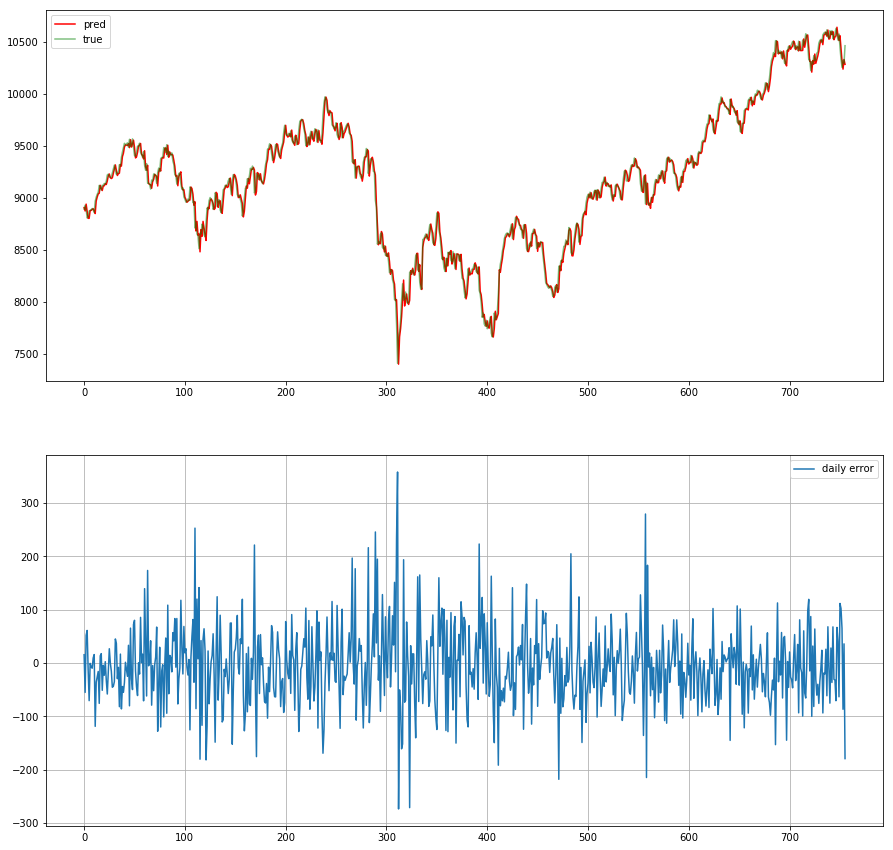

In [86]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

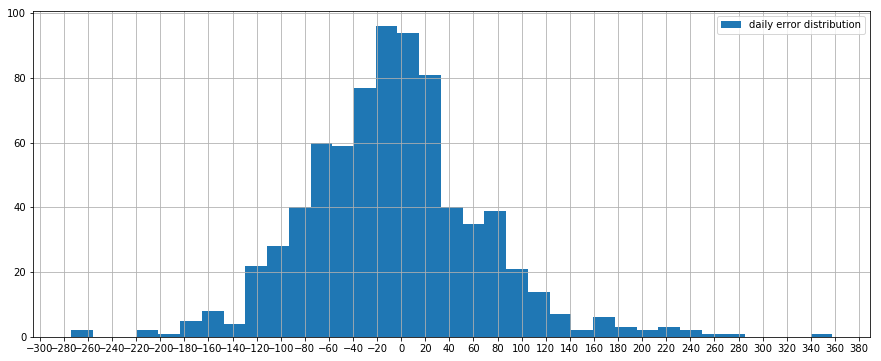

In [89]:
fig = plt.figure(figsize=(15,6))
plt.hist((regr.predict(test_feature_trans)-test_label_trans)*11000, bins=35, label='daily error distribution')
plt.xticks(range(-300,400,20))
plt.grid()
plt.legend()
plt.show()

## DecisionTreeRegressor(): 非常不準確

In [94]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 1.00
Testing Score: 0.99
[ 8930.570313    8866.349609    8975.580078    8857.419922    8718.120117
  8871.27002     8988.839844    8942.165039    8891.22656233  8866.349609
  8930.570313    8942.165039    8975.580078    8908.049805    9157.179688
  9157.179688    8807.8300785   9007.61360667  9007.61360667  8807.8300785
  8807.8300785   9111.459961    9111.459961    9111.459961    9111.459961
  9111.459961    9255.94043     9255.94043     9255.94043     9255.94043
  9308.599609    9372.370117    9308.599609    9308.599609    9255.94043
  9308.599609    9372.370117    9308.599609    9471.299805    9583.930176
  9485.349609    9485.349609    9485.349609    9473.30957     9473.30957
  9473.30957     9632.52018267  9473.30957     9473.30957     9632.52018267
  9473.30957     9502.389648    9502.389648    9502.389648    9473.30957
  9473.30957     9473.30957     9502.389648    9502.389648    9502.389648
  9502.389648    9509.730469    9300.219727    9292.799805    8891.87988

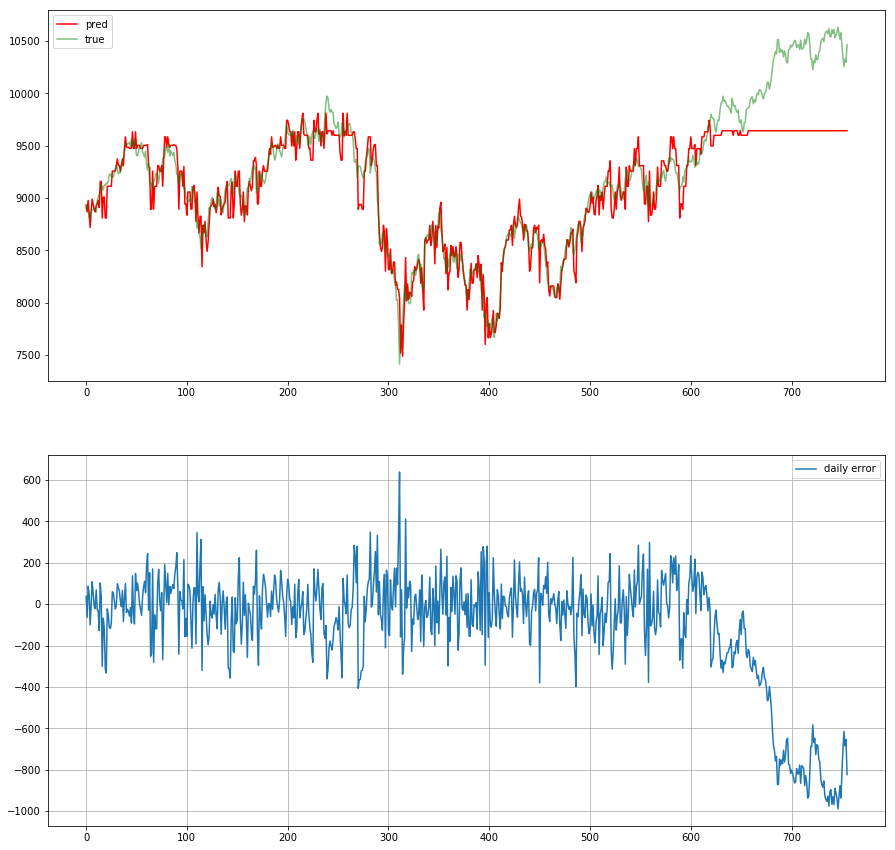

In [95]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

## ensemble.AdaBoostRegressor()

In [96]:
from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = ensemble.AdaBoostRegressor()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 0.99
Testing Score: 0.99
[ 8827.40098184  8827.40098184  8851.68805939  8842.7109132   8827.40098184
  8827.40098184  8827.40098184  8827.40098184  8827.40098184  8827.40098184
  8827.40098184  8827.40098184  8922.12006876  9002.80216995  9097.48674117
  9104.72372397  9134.02828637  9134.02828637  9134.02828637  9134.02828637
  9134.02828637  9160.34935939  9160.34935939  9160.34935939  9160.34935939
  9160.34935939  9160.34935939  9160.34935939  9160.34935939  9160.34935939
  9160.34935939  9195.0581935   9160.34935939  9160.34935939  9160.34935939
  9160.34935939  9195.0581935   9160.34935939  9365.85327428  9365.85327428
  9365.85327428  9365.85327428  9365.85327428  9365.85327428  9365.85327428
  9365.85327428  9365.85327428  9365.85327428  9365.85327428  9410.74901456
  9365.85327428  9365.85327428  9365.85327428  9365.85327428  9365.85327428
  9365.85327428  9365.85327428  9365.85327428  9365.85327428  9365.85327428
  9365.85327428  9195.0581935   9160.34935939  

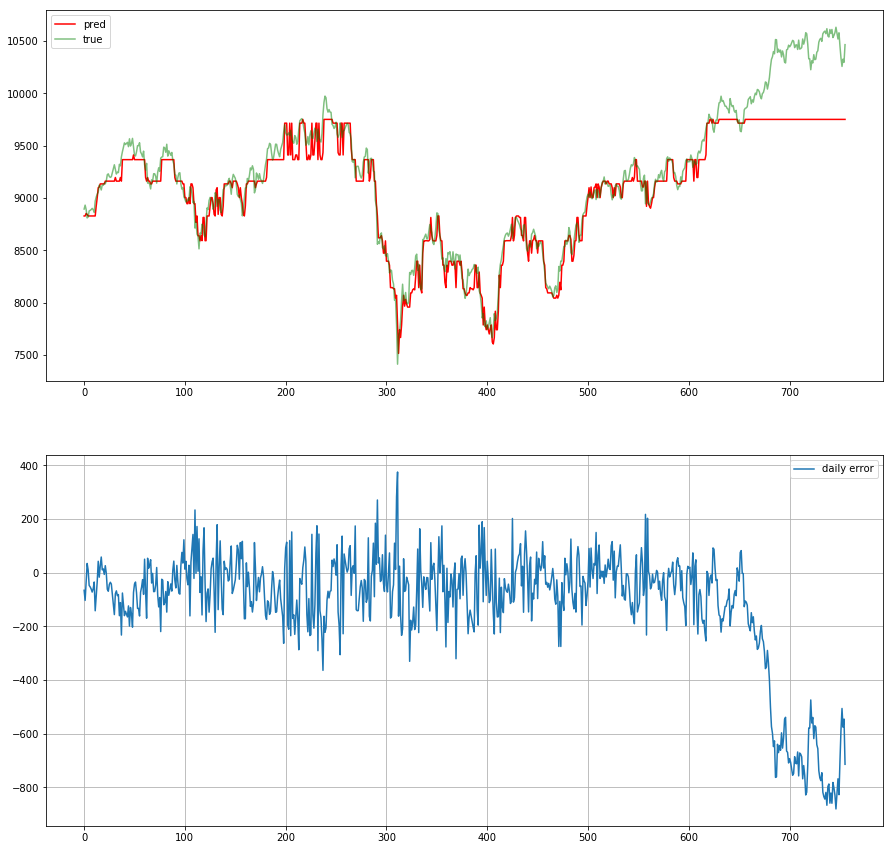

In [97]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

## ensemble.GradientBoostingRegressor()

In [98]:
from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = ensemble.GradientBoostingRegressor()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 1.00
Testing Score: 1.00
[ 8876.88753169  8876.88753169  8928.59885096  8876.88753169  8791.30723274
  8809.58665651  8875.5598656   8875.5598656   8876.88753169  8876.88753169
  8876.88753169  8875.5598656   8965.06826542  8965.06826542  9015.40813542
  9015.40813542  9018.9908621   9018.9908621   9026.63261436  9018.49273267
  9015.96762867  9094.09594693  9160.45205926  9160.45205926  9139.67408603
  9139.67408603  9139.67408603  9183.60495751  9139.67408603  9139.67408603
  9139.67408603  9299.89896476  9223.45076827  9183.60495751  9183.60495751
  9183.60495751  9299.89896476  9223.45076827  9443.78915001  9514.13186637
  9514.13186637  9514.13186637  9514.13186637  9514.13186637  9510.87278901
  9514.13186637  9518.51475252  9522.0137523   9498.60235281  9529.03638564
  9516.00506389  9495.34327545  9512.74598653  9516.00506389  9516.00506389
  9516.00506389  9516.00506389  9516.00506389  9516.00506389  9508.72424145
  9511.98331881  9411.9606894   9225.32396578  

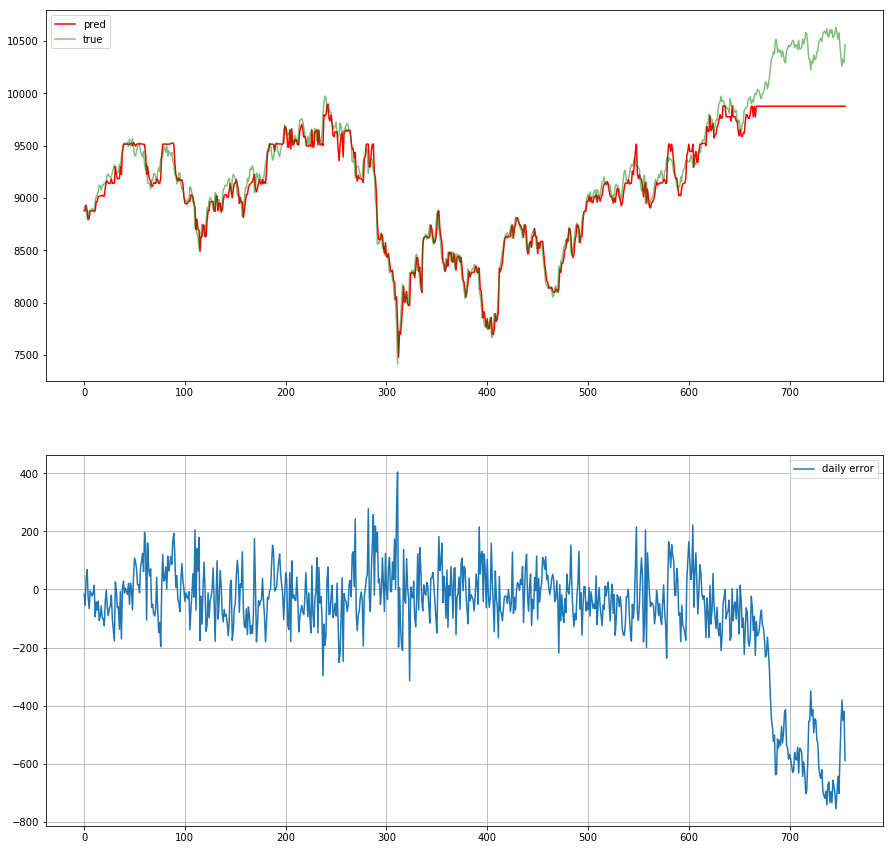

In [99]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

## ensemble.RandomForestRegressor()

In [100]:
from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = ensemble.RandomForestRegressor()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 1.00
Testing Score: 0.99
[ 8870.99020189  8882.98048512  8955.74430333  8901.59859398  8811.57434247
  8825.14361346  8839.85897458  8921.35702156  8902.9753093   8883.79593755
  8921.21681338  8876.71172541  8969.16928871  9018.19641278  9094.58039703
  9082.54420553  8988.75801771  9032.86738933  8984.55147138  8900.08303236
  8939.63488784  9109.59966637  9068.51171074  9082.26363117  9232.50944017
  9225.46442067  9188.31442067  9157.97740897  9157.97740897  9208.07643237
  9242.96344417  9327.6637047   9230.85247403  9222.22252603  9218.21090497
  9208.07643237  9327.6637047   9292.21292333  9369.8130861   9527.14418963
  9554.56914073  9551.95222186  9517.25650227  9506.59868964  9510.36270334
  9510.36270334  9595.11569683  9492.62481284  9497.93443197  9522.21569015
  9491.89073074  9513.70707194  9514.69993497  9535.48063157  9543.28663747
  9511.63189304  9520.58741057  9490.34073074  9514.62599277  9513.79303387
  9532.32911787  9442.02823089  9243.38982758  

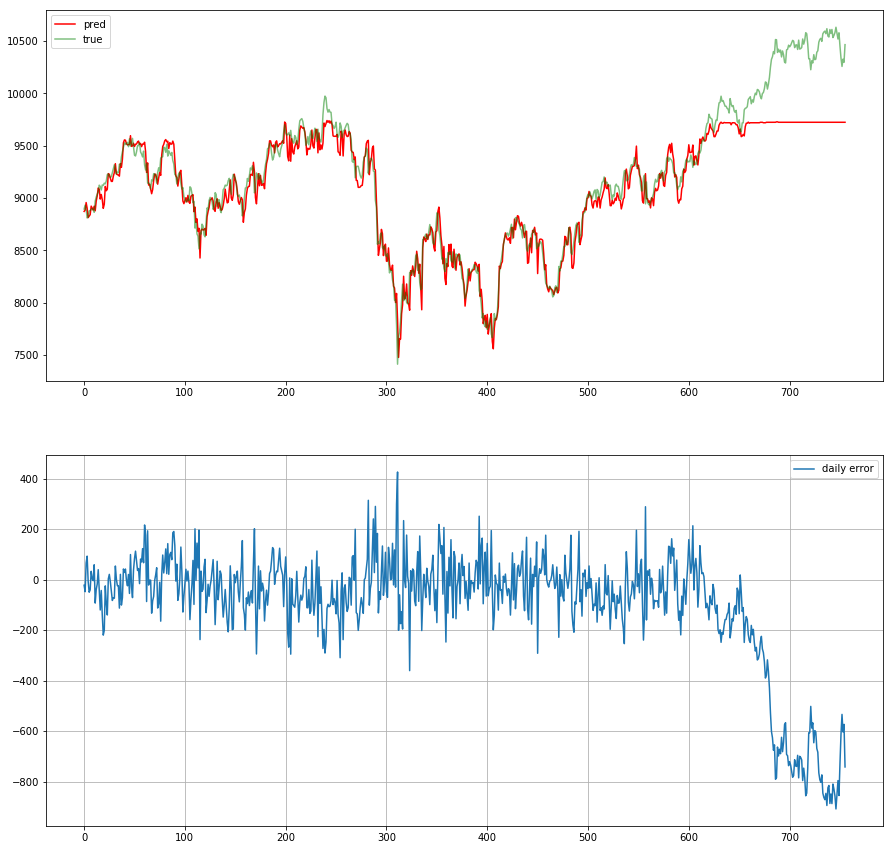

In [101]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

## svm.LinearSVR(): 效果比linear regression稍差，不過也是滿不錯的

In [102]:
from sklearn import cross_validation, svm

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = svm.LinearSVR()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 0.99
Testing Score: 1.00
[  8878.20427717   8858.6234384    8900.48335399   8854.59757601
   8780.23058371   8782.46579602   8845.1864693    8854.68364117
   8861.87141976   8867.62496698   8853.08165057   8828.59033715
   8935.38831191   8978.83825958   9007.96688815   9020.53415821
   9085.2813594    9072.71575332   9044.8588027    9087.06953383
   9088.74409348   9109.5852382    9103.80281469   9130.64334956
   9186.16026378   9199.39510852   9172.15572084   9161.04880914
   9167.16868803   9207.13716547   9249.80315032   9286.22118556
   9241.37185009   9192.76100006   9207.54138479   9210.25318862
   9290.020812     9279.07626761   9359.51456619   9403.44224447
   9451.1780876    9486.78057858   9476.10922079   9481.0253462
   9494.73939729   9458.09162785   9529.51216907   9466.15631475
   9487.11817945   9530.95473023   9457.19841586   9372.54420468
   9365.40885296   9406.36148582   9469.51887405   9473.30816333
   9493.07674766   9401.97994418   9381.2283948   

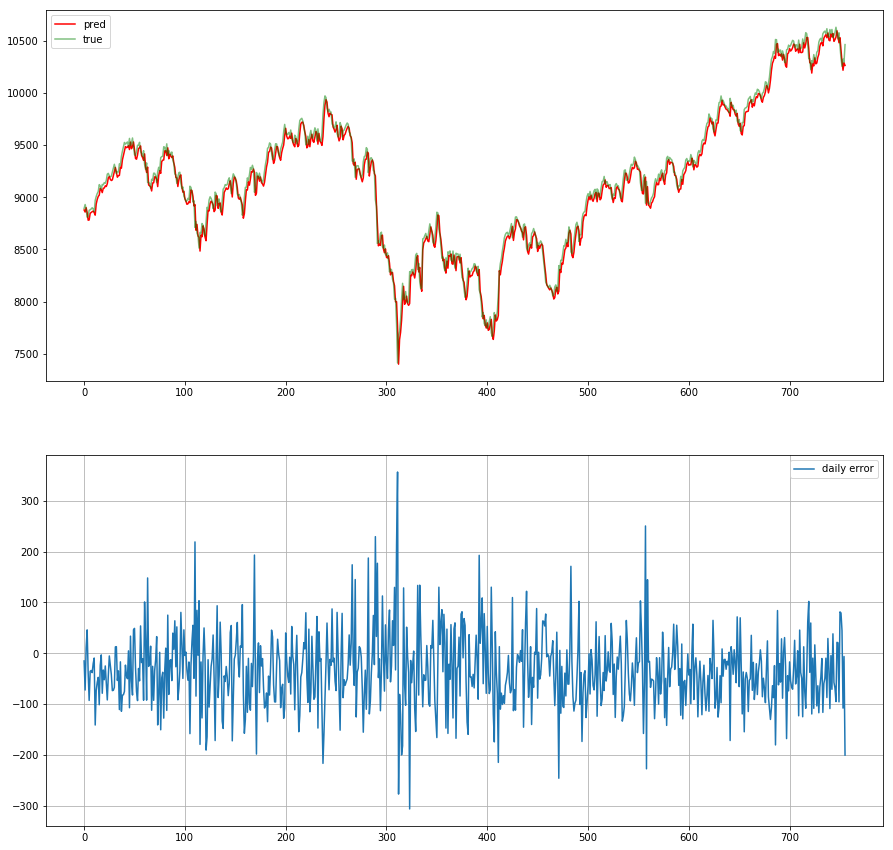

In [103]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

# 結論：Linear Regression用於預測股價走勢最強，可是也還搬不上程式交易的檯面

# 以下Summary，方便改天數n做實驗

## 改成ㄧ天看看（只用前一天做預測，效果也不錯，那可能跟丟銅板差不多了...）

In [113]:
from pandas_datareader import data as web
TWII = web.DataReader(name='^TWII', data_source='yahoo',
                     start='2000-01-01')

cols = ['Adj Close']
df = TWII[cols]

for i in range(1):
    new_col = 'Close_t-'+str(i+1)
    df[new_col] = df['Adj Close'].shift(i+1)

df.dropna(inplace=True)
df_values = np.array(df)

train_feature = df_values[:3000,1:]
train_label = df_values[:3000,0]

test_feature = df_values[3000:,1:]
test_label = df_values[3000:,0]

train_feature_trans = train_feature/11000
train_label_trans = train_label/11000

test_feature_trans = test_feature/11000
test_label_trans = test_label/11000

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
from sklearn import cross_validation, linear_model

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans, train_label_trans,
                                                                  test_size=0.25,random_state=0) 

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Training Score: %.2f' % regr.score(X_train,y_train))
print('Testing Score: %.2f' % regr.score(X_test, y_test))
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))

#分數太高，感覺有錯誤
print(regr.predict(test_feature_trans)*11000)
print('Score: %.2f' % regr.score(test_feature_trans*11000, test_label_trans*11000))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(test_feature_trans)*11000 - test_label_trans*11000) ** 2))
print("mean absolute error: %.2f"% np.mean(abs(regr.predict(test_feature_trans*11000)-test_label_trans*11000)))

Training Score: 1.00
Testing Score: 1.00
Coefficients:[ 0.99863733], intercept 0.00
[  7233.56190385   7355.59558158   7150.29563992 ...,  10321.45824953
  10291.26994929  10324.71454823]
Score: 0.99
Residual sum of squares: 4682.12
mean absolute error: 52.68


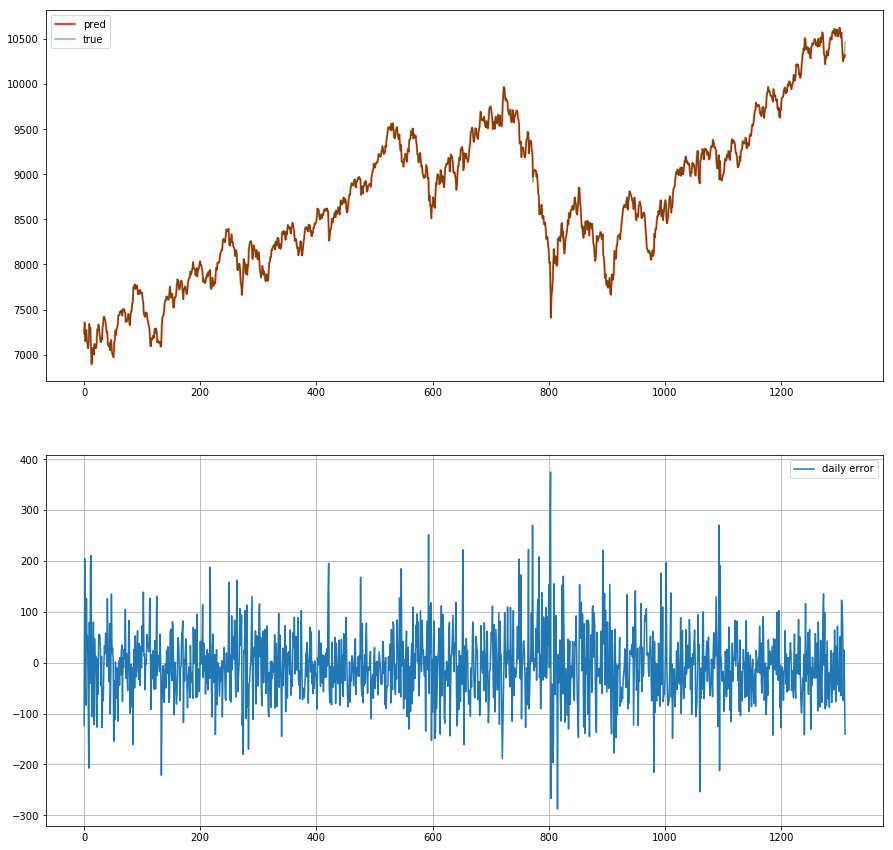

In [115]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(regr.predict(test_feature_trans)*11000, c='r', label='pred')
p1.plot(test_label_trans*11000, c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(((regr.predict(test_feature_trans)-test_label_trans)*11000), label='daily error')
p2.grid()
p2.legend()

plt.show()

# 對照組：直接令昨天的當今天的預測...結果都差不多，其實ML/DL都沒學到什麼

In [116]:
from pandas_datareader import data as web
TWII = web.DataReader(name='^TWII', data_source='yahoo',
                     start='2000-01-01')

cols = ['Adj Close']
df = TWII[cols]
df['control'] = df['Adj Close'].shift(1)

df.dropna(inplace=True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
print('Residual sum of squares:',np.mean(np.abs(df['Adj Close']-df['control'])**2))
print('mean abs error:',np.mean(np.abs(df['Adj Close']-df['control'])))

Residual sum of squares: 8570.344001557056
mean abs error: 65.99956076200408


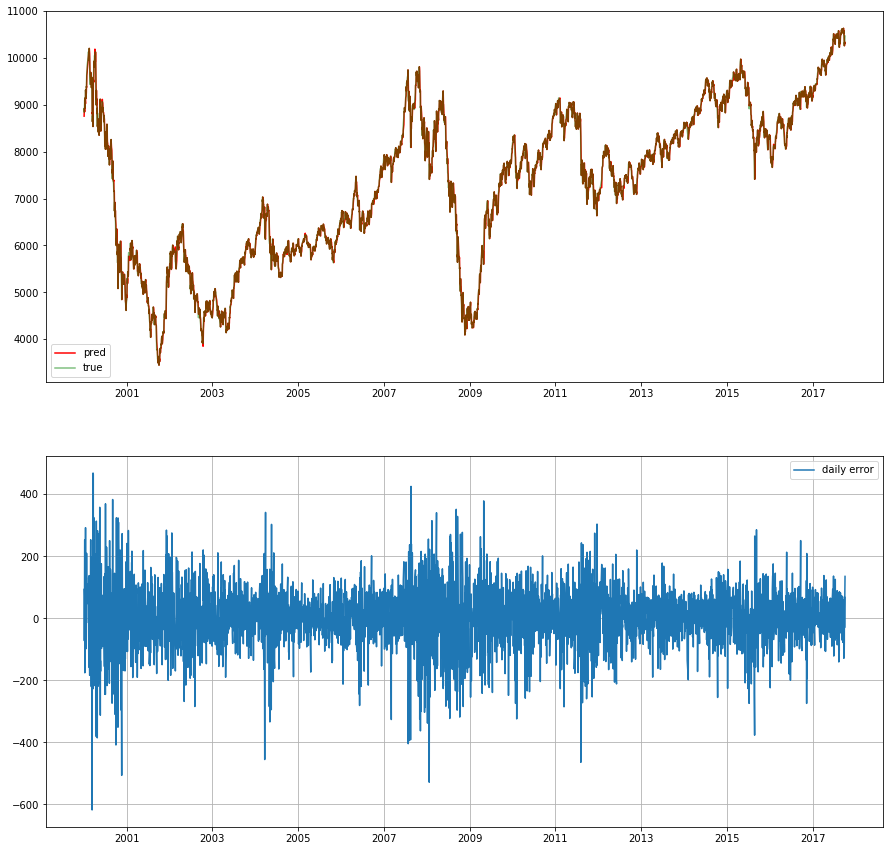

In [119]:
fig = plt.figure(figsize=(15,15))
p1 = plt.subplot(211)
p2 = plt.subplot(212)

p1.plot(df['control'], c='r', label='pred')
p1.plot(df['Adj Close'], c='g', label='true', alpha=0.5)
p1.legend()

p2.plot(df['Adj Close']-df['control'], label='daily error')
p2.grid()
p2.legend()

plt.show()